In [4]:
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [7]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = tf.keras.datasets.mnist.load_data()

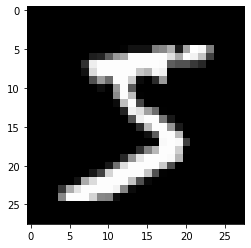

In [9]:
plt.imshow(X_TRAIN[0],cmap='gray')

In [11]:
# rescalling data

x_train = X_TRAIN/255.0
x_test = X_TEST/255.0

 

In [18]:
x_train[0].shape

(28, 28)

In [47]:
encoder_inp = keras.Input(shape = (28,28,1))
flat = keras.layers.Flatten()(encoder_inp)

enc_hl1 = keras.layers.Dense(64,activation='relu')(flat)
enc_hl2 = keras.layers.Dense(32,activation='relu')(enc_hl1)
encoder = keras.Model(encoder_inp,enc_hl2)

dec_inp1 =  keras.layers.Dense(32,activation='relu')(enc_hl2)
dec_inp = keras.layers.Dense(784,activation='relu')(dec_inp1)
dec_out = keras.layers.Reshape((28,28,1))(dec_inp)

optim = keras.optimizers.Adam(lr=0.001)
autoencoder = keras.Model(encoder_inp,dec_out)

autoencoder.summary()




Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 784)               25872     
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0   

In [22]:
import time
import os
from keras.callbacks import TensorBoard

In [48]:

name = 'model_dlx1_{}'.format(int(time.time()))
name = os.path.join("logs",name)
tb= TensorBoard(log_dir=name)
autoencoder.compile(optim,loss='mse')
mod = autoencoder.fit(x_train,x_train,epochs=10,batch_size=32,validation_split=0.1,callbacks=[tb])

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0413 - val_loss: 0.0223
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0219 - val_loss: 0.0208
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0202 - val_loss: 0.0199
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0199 - val_loss: 0.0196
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0194 - val_loss: 0.0194
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0191 - val_loss: 0.0192
Epoch 8/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0190 - val_loss: 0.0189
Epoch 9/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0189 - val_loss: 0.0187
Epoch 10/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.018

In [49]:
# lets see how the encoder converts
img1 = x_test[0]
enc_pred = encoder.predict(img1.reshape(-1,28,28,1))[0] # we are putting a org test img


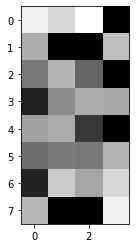

In [52]:
plt.imshow(enc_pred.reshape(8,4),cmap='gray')

In [53]:
auto_enco = autoencoder.predict(img1.reshape(-1,28,28,1))[0]

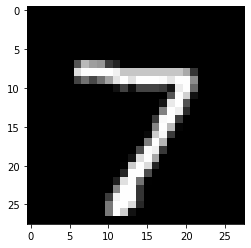

In [43]:

plt.imshow(img1,cmap='gray')

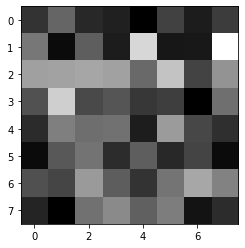

In [44]:
plt.imshow(enc_pred.reshape(8,8),cmap='gray')

In [45]:
auto_enco = autoencoder.predict(img1.reshape(-1,28,28,1))[0]

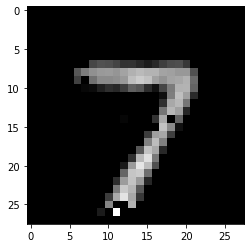

In [55]:
plt.imshow(auto_enco,cmap='gray')